# Imports and Constants

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from utils import CSV_Handler, interpolate, create_datasheet
from scipy.interpolate import interp1d

EPS0 = 8.8541878128e-14   # permittivity of free space in F/cm
C    = 2.9979245800e10    # speed of light in cm/s
PI   = np.pi              # pi
#print(1/EPS0*C)

# Pull in data

In [50]:
Bi2212_data = {}

csvh = CSV_Handler('Bi2212-opt-6k.dat', '6K', Bi2212_data,
                   datadir="./data/BSCCO", delimiter='\t', opt_consts = ['s1ab','s2ab'])
csvh = CSV_Handler('Bi2212-opt-50k.dat', '50K', Bi2212_data,
                   datadir="./data/BSCCO", delimiter='\t', opt_consts = ['s1ab','s2ab'])
csvh = CSV_Handler('Bi2212-opt-80k.dat', '80K', Bi2212_data,
                   datadir="./data/BSCCO", delimiter='\t', opt_consts = ['s1ab','s2ab'])
csvh = CSV_Handler('Bi2212-opt-100k.dat', '100K', Bi2212_data,
                   datadir="./data/BSCCO", delimiter=' ', opt_consts = ['s1ab','s2ab'])
csvh = CSV_Handler('Bi2212-opt-200k.dat', '200K', Bi2212_data,
                   datadir="./data/BSCCO", delimiter='\t', opt_consts = ['s1ab','s2ab'])
csvh = CSV_Handler('Bi2212-opt-295k.dat', '295K', Bi2212_data,
                   datadir="./data/BSCCO", delimiter='\t', opt_consts = ['s1ab','s2ab'])
csvh = CSV_Handler('Kovaleva_2004_k_s1c_10K.csv', '6K', Bi2212_data,
                   datadir="./data/BSCCO", delimiter=' ', opt_consts = ['s1c'])
csvh = CSV_Handler('Kovaleva_2004_k_s1c_100K.csv', '100K', Bi2212_data,
                   datadir="./data/BSCCO", delimiter=' ', opt_consts = ['s1c'])


Reading data from ./data/BSCCO/Bi2212-opt-6k.dat
Reading data from ./data/BSCCO/Bi2212-opt-50k.dat
Reading data from ./data/BSCCO/Bi2212-opt-80k.dat
Reading data from ./data/BSCCO/Bi2212-opt-100k.dat
Reading data from ./data/BSCCO/Bi2212-opt-200k.dat
Reading data from ./data/BSCCO/Bi2212-opt-295k.dat
Reading data from ./data/BSCCO/Kovaleva_2004_k_s1c_10K.csv
Reading data from ./data/BSCCO/Kovaleva_2004_k_s1c_100K.csv


## Convert to numpy arrays

In [51]:
for t in Bi2212_data.keys():
    for x in Bi2212_data[t].keys():
        Bi2212_data[t][x] = np.array(Bi2212_data[t][x])

## Compute and interpolate all optical constants from this data

In [52]:
for temp in Bi2212_data.keys():
    FACTOR = 1/(2*PI*EPS0*C)
    
    k = Bi2212_data[temp]["k_s1ab"]
    s1 = Bi2212_data[temp]["s1ab"]
    s2 = Bi2212_data[temp]["s2ab"]
    
    sigma = s1+s2*1j
    e1 = -FACTOR*s2/k+1
    e2 =  FACTOR*s1/k
    N = np.sqrt(e1+e2*1j)
    R = np.abs((1-N)/(1+N))**2
    
    Bi2212_data[temp]["k_e1ab"] = k
    Bi2212_data[temp]["e1ab"] = e1
    
    Bi2212_data[temp]["k_e2ab"] = k
    Bi2212_data[temp]["e2ab"] = e2
    
    Bi2212_data[temp]["k_nab"] = k
    Bi2212_data[temp]["nab"] = N.real
    
    Bi2212_data[temp]["k_kab"] = k
    Bi2212_data[temp]["kab"] = N.imag
    
    Bi2212_data[temp]["k_Rab"] = k
    Bi2212_data[temp]["Rab"] = R
    
    Bi2212_data[temp]["k_tauab"] = k
    Bi2212_data[temp]["tauab"] = (4*PI/(16000**2))*1/((1/sigma).real)
    
    print("Temp {}: e1ab=0 at {}".format(temp,k[np.argmin(np.abs(e1))]))
print()
    

Temp 6K: e1ab=0 at 6556.84
Temp 50K: e1ab=0 at 6556.84
Temp 80K: e1ab=0 at 6510.56
Temp 100K: e1ab=0 at 6510.56
Temp 200K: e1ab=0 at 6479.7
Temp 295K: e1ab=0 at 6464.28



In [53]:
for temp in Bi2212_data.keys():
    FACTOR = 1/(2*PI*EPS0*C)
    if "k_s1c" in Bi2212_data[temp].keys():
        k = Bi2212_data[temp]["k_s1c"]
        s1 = Bi2212_data[temp]["s1c"]
    
        e2 =  FACTOR*s1/k

        Bi2212_data[temp]["k_e2c"] = k
        Bi2212_data[temp]["e2c"] = e2
    
print()

In [54]:
interp_fxns = interpolate(Bi2212_data)

6K
	Interpolating s1ab
	Interpolating s2ab
	Interpolating s1c
	Interpolating e1ab
	Interpolating e2ab
	Interpolating nab
	Interpolating kab
	Interpolating Rab
	Interpolating tauab
	Interpolating e2c
50K
	Interpolating s1ab
	Interpolating s2ab
	Interpolating e1ab
	Interpolating e2ab
	Interpolating nab
	Interpolating kab
	Interpolating Rab
	Interpolating tauab
80K
	Interpolating s1ab
	Interpolating s2ab
	Interpolating e1ab
	Interpolating e2ab
	Interpolating nab
	Interpolating kab
	Interpolating Rab
	Interpolating tauab
100K
	Interpolating s1ab
	Interpolating s2ab
	Interpolating s1c
	Interpolating e1ab
	Interpolating e2ab
	Interpolating nab
	Interpolating kab
	Interpolating Rab
	Interpolating tauab
	Interpolating e2c
200K
	Interpolating s1ab
	Interpolating s2ab
	Interpolating e1ab
	Interpolating e2ab
	Interpolating nab
	Interpolating kab
	Interpolating Rab
	Interpolating tauab
295K
	Interpolating s1ab
	Interpolating s2ab
	Interpolating e1ab
	Interpolating e2ab
	Interpolating nab
	Interpol

# Create datasheets

In [5]:
ks=np.arange(100,18000,1)
create_datasheet(data_dir="./", source="Tu_2002",delimiter=' ',\
                    ks=ks, temp="6K", opts=["e1ab"], interp_fxn_obj=interp_fxns)
create_datasheet(data_dir="./", source="Tu_2002",delimiter=' ',\
                    ks=ks, temp="6K", opts=["e2ab"], interp_fxn_obj=interp_fxns)
create_datasheet(data_dir="./", source="Tu_2002",delimiter=' ',\
                    ks=ks, temp="100K", opts=["e1ab"], interp_fxn_obj=interp_fxns)
create_datasheet(data_dir="./", source="Tu_2002",delimiter=' ',\
                    ks=ks, temp="100K", opts=["e2ab"], interp_fxn_obj=interp_fxns)

Created datasheet for ['e1ab'] (T=6K) at ./Tu_2002_Bi2212_k_e1ab_6K.dat
Created datasheet for ['e2ab'] (T=6K) at ./Tu_2002_Bi2212_k_e2ab_6K.dat
Created datasheet for ['e1ab'] (T=100K) at ./Tu_2002_Bi2212_k_e1ab_100K.dat
Created datasheet for ['e2ab'] (T=100K) at ./Tu_2002_Bi2212_k_e2ab_100K.dat


In [62]:
ks=np.arange(150,650,1)
create_datasheet(data_dir="./", source="Kovaleva_2004",delimiter=' ',\
                    ks=ks, temp="6K", opts=["e2c"], interp_fxn_obj=interp_fxns)
create_datasheet(data_dir="./", source="Kovaleva_2004",delimiter=' ',\
                    ks=ks, temp="100K", opts=["e2c"], interp_fxn_obj=interp_fxns)

Created datasheet for ['e2c'] (T=6K) at ./Kovaleva_2004_Bi2212_k_e2c_6K.dat
Created datasheet for ['e2c'] (T=100K) at ./Kovaleva_2004_Bi2212_k_e2c_100K.dat


# Extra plots and whatnot

In [6]:
from IPython.display import Image
#Image("/home/meberko/Pictures/Screenshot from 2020-05-14 15-05-25.png")

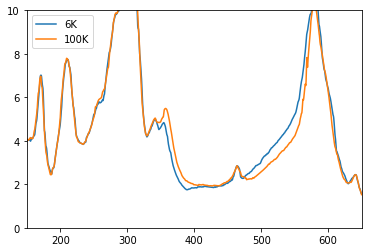

In [59]:
opt="e2c"; ks=np.arange(100,650,0.1);
for temp in interp_fxns.keys():
    if opt in interp_fxns[temp].keys():
        plt.plot(ks,interp_fxns[temp][opt](ks),label=temp)
plt.axis([150,650,0,10]);
#plt.xscale("log")
plt.legend();
